In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [2]:

tii_data = gpd.read_file("zip:////Users/mensab/Documents/GISMapFiles/TIIArchaeology.zip")
tii_data



,dc_identif,url,Townland,dc_title,dc_publish,dc_creator,dc_creat_1,dc_creat_2,dc_creat_3,dc_subject,dc_subje_1,dc_subje_2,dc_subje_3,dc_subje_4,dc_contrib,ITM_X,ITM_Y,Latitude,Longitude,geometry
0,00E0810,https://repository.dri.ie/catalog/0000cd770,Sheephouse,"Archaeological excavation report, 00E0810 Shee...",Transport Infrastructure Ireland,"Moore, Declan",NaN,NaN,NaN,Ring-ditch,Kiln - corn-drying,Habitation site,Field system,NaN,Irish Archaeological Consultancy Ltd.,705948.11,774647.57,53.710747,-6.395089,POINT (705948.110 774647.570)
1,03E0158,https://repository.dri.ie/catalog/0000cd788,Balregan,"Archaeological excavation report, 03E0158 Site...",Transport Infrastructure Ireland,"Delaney, Shane",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irish Archaeological Consultancy Ltd.,702735.13,810103.95,54.029886,-6.431870,POINT (702735.130 810103.950)
2,E3047,https://repository.dri.ie/catalog/0000cd79j,Leshamstown,"Archaeological excavation report, E3047 Lesha...",Transport Infrastructure Ireland,"Schweitzer, Holger","Ginn, Vicky",NaN,NaN,Pit,Burnt mound,NaN,NaN,NaN,Archaeological Consultancy Services Ltd,695320.17,751836.57,53.507868,-6.562996,POINT (695320.170 751836.570)
3,E3187,https://repository.dri.ie/catalog/0000cd809,Derver,"Archaeological excavation report, E3187 Derve...",Transport Infrastructure Ireland,"Reilly, Stuart","Ginn, Vicky",NaN,NaN,Pit,Hearth,NaN,NaN,NaN,Archaeological Consultancy Services Ltd,666275.63,780427.55,53.769222,-6.994678,POINT (666275.630 780427.550)
4,02E1145,https://repository.dri.ie/catalog/0000cd81k,Towlaght,"Archaeological excavation report, 02E1145 Tow...",Transport Infrastructure Ireland,"Linnane, Stephen",NaN,NaN,NaN,Fulacht fia,Pit,NaN,NaN,NaN,Archaeological Consultancy Services Ltd.,664552.74,743658.51,53.460778,-7.132455,POINT (664552.740 743658.510)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,02E1144,https://repository.dri.ie/catalog/zs269q242,Griffinstown,"Archaeological excavation report, 02E1144 Gri...",Transport Infrastructure Ireland,"Linnane, Stephen",NaN,NaN,NaN,Metalworking site,Kiln,NaN,NaN,NaN,Archaeological Consultancy Services Ltd.,657611.26,745986.05,53.460778,-7.132455,POINT (657611.260 745986.050)
1626,E2440,https://repository.dri.ie/catalog/zs269q25b,Ballykeeran,"Archaeological excavation report, E2440 Bally...",Transport Infrastructure Ireland,"Wilkins, Brendon",NaN,NaN,NaN,Cist,Ring-ditch,Cremated remains,Cremated remains,NaN,Headland Archaeology Ltd,560379.29,722806.53,53.254138,-8.593745,POINT (560379.290 722806.530)
1627,E3874,https://repository.dri.ie/catalog/zs269q26m,Ballynaclogh,"Archaeological excavation report, E3874 Bally...",Transport Infrastructure Ireland,"Maginness, Clare","O'Dowd, Jean",NaN,NaN,Prehistoric site - lithic scatter,Settlement platform,Structure - peatland,Road - class 3 togher,NaN,The Archaeology Company,574088.33,726504.66,53.288218,-8.388612,POINT (574088.330 726504.660)
1628,03E1458,https://repository.dri.ie/catalog/zs269q331,Ballynamona,"Archaeological excavation report, 03E1458 Bal...",Transport Infrastructure Ireland,"Cotter, Eamonn",NaN,NaN,NaN,Pit,NaN,NaN,NaN,NaN,Archaeological Consultancy Services Ltd,581781.34,599792.07,52.149672,-8.266217,POINT (581781.340 599792.070)


In [32]:
tii_data.columns


Index(['dc_identif', 'url', 'Townland', 'dc_title', 'dc_publish', 'dc_creator',
       'dc_creat_1', 'dc_creat_2', 'dc_creat_3', 'dc_subject', 'dc_subje_1',
       'dc_subje_2', 'dc_subje_3', 'dc_subje_4', 'dc_contrib', 'ITM_X',
       'ITM_Y', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

load amd visualise archaeological data

In [3]:

monuments_points = gpd.read_file("zip:///Users/mensab/Documents/GISMapFiles/NMS_OpenData_20230623_shp.zip")
monuments_points


,OID_,OBJECTID,ENTITY_ID,CLASS_CODE,SMRS,COUNTY,TOWNLAND,COUNTY_ID,ZONE_ID,ITM_E,ITM_N,LATITUDE,LONGITUDE,MONUMENT_T,FIRST_EDIT,LATEST_EDI,WEBSITE_LI,WEB_NOTES,geometry
0,1,1,CL00557,WETO,CL005-135----,CLARE,GLENINSHEEN,4,R126607,523006,702345,53.066178,-9.148800,Megalithic tomb - wedge tomb,NaN,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,See linked document with details from Ruaidhrí...,POINT (523006.000 702345.000)
1,2,2,CL00558,WETO,CL005-136001-,CLARE,GLENINSHEEN,4,R126614,523061,702431,53.066959,-9.148001,Megalithic tomb - wedge tomb,NaN,Indicated (1916),https://maps.archaeology.ie/HistoricEnvironmen...,See linked document with details from Ruaidhrí...,POINT (523061.000 702431.000)
2,3,3,CL00559,NOAN,CL005-136002-,CLARE,GLENINSHEEN,4,NaN,0,0,46.488181,-15.817314,Redundant record,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,A fulacht fia was recorded in this townland in...,POINT (0.000 0.000)
3,4,4,CL00560,HOWE,CL005-137----,CLARE,GLENINSHEEN,4,R188511,522963,702981,53.071887,-9.149594,Ritual site - holy well,NaN,'Holy Well' (1916),https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (522963.000 702981.000)
4,5,5,CL00561,ENCL,CL005-138----,CLARE,GLENSLEADE,4,R126542,523255,701680,53.060239,-9.144928,Enclosure,Not indicated,Indicated (1916),https://maps.archaeology.ie/HistoricEnvironmen...,Situated on the S slope of a slight ridge with...,POINT (523255.000 701680.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162519,162520,162520,KD03378,RGDH,KD011-075----,KILDARE,CASTLETOWN,13,R192421,697856,735145,53.357448,-6.529970,Ring-ditch,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,Reported by Jean-Charles Caillere; in tillage ...,POINT (697856.000 735145.000)
162520,162521,162521,KK06300,ENCL,KK031-106----,KILKENNY,BAWNHUBBAMADDEREEN,14,R192422,648593,638235,52.493353,-7.284427,Enclosure,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,In tillage. It is located immediately NE of a ...,POINT (648593.000 638235.000)
162521,162522,162522,KK06301,ENCL,KK019-147----,KILKENNY,GARRINCREEN,14,R192424,652516,656984,52.661492,-7.223692,Enclosure,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,In tillage. An oval enclosure (dims. c. 63m NW...,POINT (652516.000 656984.000)
162522,162523,162523,DG04008,PLAM,DG018-042----,DONEGAL,DRUMFAD LOWER,7,NaN,623136,936956,55.179339,-7.636779,Platform,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,"In pasture, located on top of a broad low hill...",POINT (623136.000 936956.000)


In [21]:
monuments_points.columns

Index(['OID_', 'OBJECTID', 'ENTITY_ID', 'CLASS_CODE', 'SMRS', 'COUNTY',
       'TOWNLAND', 'COUNTY_ID', 'ZONE_ID', 'ITM_E', 'ITM_N', 'LATITUDE',
       'LONGITUDE', 'MONUMENT_T', 'FIRST_EDIT', 'LATEST_EDI', 'WEBSITE_LI',
       'WEB_NOTES', 'geometry'],
      dtype='object')

In [23]:
monuments_points['ENTITY_ID'].value_counts()


ENTITY_ID
DU05051    2
MA09436    2
CL00557    1
OF02422    1
OF02416    1
          ..
GA13532    1
GA13533    1
GA13536    1
GA13537    1
CL09984    1
Name: count, Length: 162522, dtype: int64

AttributeError: 'GeoDataFrame' object has no attribute '__type__'

In [4]:
web_notes = monuments_points["WEB_NOTES"]
print(web_notes)

0         See linked document with details from Ruaidhrí...
1         See linked document with details from Ruaidhrí...
2         A fulacht fia was recorded in this townland in...
3         The Archaeological Survey of Ireland (ASI) is ...
4         Situated on the S slope of a slight ridge with...
                                ...                        
162519    Reported by Jean-Charles Caillere; in tillage ...
162520    In tillage. It is located immediately NE of a ...
162521    In tillage. An oval enclosure (dims. c. 63m NW...
162522    In pasture, located on top of a broad low hill...
162523    Reported by Conn Herriott. Visible on GeoHive ...
Name: WEB_NOTES, Length: 162524, dtype: object


In [5]:
# Assuming you want to access the record at index 2 (for example):
selected_record = monuments_points.iloc[2]

# Now, you can access individual columns within the selected record, e.g., "WEB_NOTES":
web_notes_value = selected_record["WEB_NOTES"]

# Print the value of the "WEB_NOTES" column for the selected record
print(web_notes_value)

A fulacht fia was recorded in this townland in the vicinity of Gleninsheen wedge tomb (CL005-136001-) (pers. comm. T. Coffey, SMR file) and listed in the RMP (1996). There was no visible trace of a fulacht when this location and surrounding area were ins


In [1]:
baronies = gpd.read_file("zip:///Users/mensab/Documents/GISMapFiles/Baronies_-_OSi_National_Statutory_Boundaries_-_Generalised_20m-shp.zip")
sligo_donegal = baronies[baronies['COUNTY'].isin(['SLIGO', 'DONEGAL', 'LEITRIM'])]

print(sligo_donegal.__class__)  
print(sligo_donegal.crs)

filtered_points = monuments_points[monuments_points['COUNTY'].isin(['SLIGO', 'DONEGAL', 'LEITRIM'])]
print(filtered_points.__class__)
print(filtered_points.crs)


fig, ax = plt.subplots(figsize=(35, 35))
sligo_donegal.plot(ax=ax, color = 'grey', )  # Adjust alpha for transparency
filtered_points.plot(ax=ax, color='black', markersize=0.7)
ax.set_title('Baronies and Filtered Points')
ax.set_axis_off()


#ax.set_xlim(0, 5)  # Adjust these values for your desired extent
#ax.set_ylim(52, 56)   # Adjust these values for your desired extent

# Adjust the position of the legend to the desired location (e.g., 'lower right')
ax.legend(['Baronies', 'Filtered Points'], loc='lower right')
ax.autoscale()

plt.show()




NameError: name 'gpd' is not defined

In [ ]:
print(tii_data.__class__)

In [7]:
sligo_donegal.describe()

,CENTROID_X,CENTROID_Y,AREA,OBJECTID,Shape__Are,Shape__Len
count,19.000000,19.000000,1.900000e+01,19.000000,1.900000e+01,19.000000
mean,592908.439474,857128.511053,4.359757e+08,180.789474,4.359667e+08,182085.715783
std,28638.870260,49461.560753,2.546374e+08,77.021338,2.546194e+08,120937.078816
min,543655.490000,797141.300000,1.180191e+08,13.000000,1.180437e+08,63882.383112
25%,571614.380000,815321.210000,2.853697e+08,142.500000,2.854058e+08,119104.213233
50%,592206.800000,843977.630000,3.482685e+08,176.000000,3.482411e+08,136320.485437
75%,611156.970000,901513.415000,5.106198e+08,240.000000,5.106193e+08,209802.923820
max,648936.310000,948447.830000,1.262017e+09,280.000000,1.261950e+09,565575.016132


In [8]:
filtered_points.describe()

,OID_,OBJECTID,COUNTY_ID,ITM_E,ITM_N,LATITUDE,LONGITUDE
count,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000
mean,94289.298172,94289.298172,18.287217,537744.462783,784219.217571,53.785843,-8.848579
std,38489.685284,38489.685284,7.769123,156293.999137,228274.996837,2.121879,2.038198
min,2325.000000,2325.000000,7.000000,0.000000,0.000000,46.488181,-15.817314
25%,39924.250000,39924.250000,7.000000,558480.000000,812982.750000,54.065097,-8.636340
50%,118910.500000,118910.500000,25.000000,572892.000000,832281.000000,54.237819,-8.415530
75%,122365.250000,122365.250000,25.000000,595923.750000,860977.250000,54.497093,-8.062554
max,162523.000000,162523.000000,25.000000,668377.000000,965456.000000,55.433548,-6.925011


In [10]:
filtered_points['MONUMENT_T'].value_counts()

MONUMENT_T
Ringfort - rath             2860
Redundant record            1157
Enclosure                   1045
Ringfort - cashel            755
Souterrain                   627
                            ... 
Cross (present location)       1
Mill - bleaching               1
Walled garden                  1
Blockhouse                     1
Concentric enclosure           1
Name: count, Length: 256, dtype: int64

<Axes: xlabel='MONUMENT_T'>

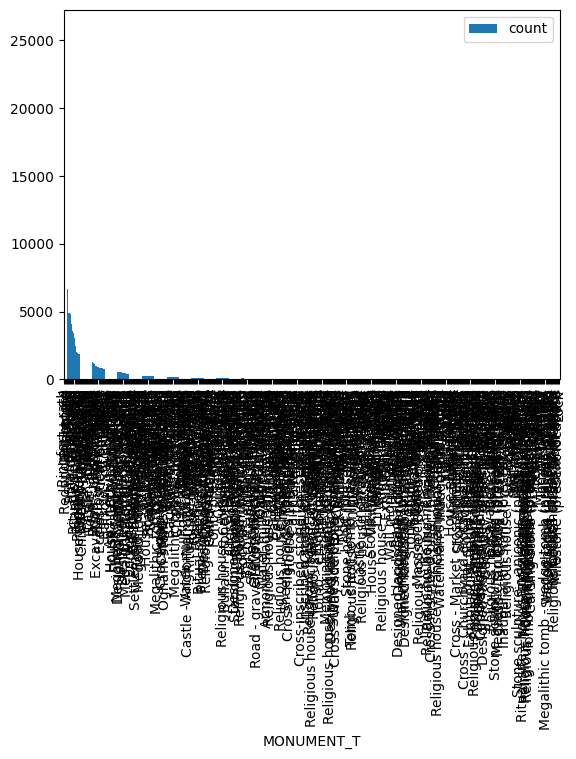

In [17]:
pd.DataFrame(monuments_points['MONUMENT_T'].value_counts()).plot.bar()


In [20]:
pd.DataFrame (monuments_points['MONUMENT_T'].nunique()).plot.bar()

ValueError: DataFrame constructor not properly called!

In [9]:
# Create a map centered at a specific location
m = folium.Map(location=[53.349805, -6.26031], crs:"EPSG2157", zoom_start=10)

# Add a marker for every record in the filtered_points GeoDataFrame 
for i, row in filtered_points.iterrows():
    # Get the lat and lon of the current record
    lon = row.geometry.x
    lat = row.geometry.y
    
    # Create a marker at the location
    marker = folium.Marker([lat, lon])
    
    # Add the marker to the map
    marker.add_to(m)

# Display the map
# m.save('map.html')
m




SyntaxError: positional argument follows keyword argument (1627397997.py, line 2)